In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from pathlib import Path
base_folder, thresholds_file = 'results/schaefer400', 'global_metrics.csv'
networks = ['', 'Cont', 'Default', 'DorsAttn', 'SalVentAttn']
networks_names = {'': 'General', 'Cont': 'Frontoparietal', 'Default': 'Default', 'DorsAttn': 'Atencional dorsal', 'SalVentAttn': 'Atencional ventral/Saliencia'}

In [2]:
def add_curve(thresholds, avg_clustering, lower_error, upper_error, group, ax):
    ax.plot(thresholds, avg_clustering, label=group)
    ax.plot(thresholds, lower_error, alpha=0.1)
    ax.plot(thresholds, upper_error, alpha=0.1)
    ax.legend()
    ax.fill_between(thresholds, lower_error, upper_error, alpha=0.2)

In [17]:
def plot_measure(base_folder, networks, measure_label, measure_desc):
    fig, axes = plt.subplots(figsize=(15, 15), nrows=len(networks) // 2 + 1, ncols=2)
    aucs = {network: {} for network in networks}
    for i, network in enumerate(networks):
        network_path = f'{base_folder}_{network}' if network else base_folder
        df = pd.read_csv(Path(network_path, thresholds_file), index_col=0)
        ax = axes[i // 2, i % 2]
        groups = df['group'].unique()
        for group in groups:
            group_metrics = df[df['group'] == group]
            thresholds = group_metrics['threshold'].values
            avg_clustering = group_metrics[measure_label].values
            lower_error, upper_error = group_metrics[measure_label] - group_metrics[f'{measure_label}_ste'], group_metrics[measure_label] + group_metrics[f'{measure_label}_ste']
            aucs[network][group] = auc(thresholds, avg_clustering)
            add_curve(thresholds, avg_clustering, lower_error, upper_error, group, ax)
    
        if network in networks_names:
            network = networks_names[network]
        ax.set_title(f'{network}')
        ax.set_xlabel('Densidad de aristas')
        ax.set_ylabel(measure_desc)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    fig.suptitle(measure_desc)
    fig.savefig(f'results/schaefer400_{measure_label}.png')
    plt.show()
    
    return aucs

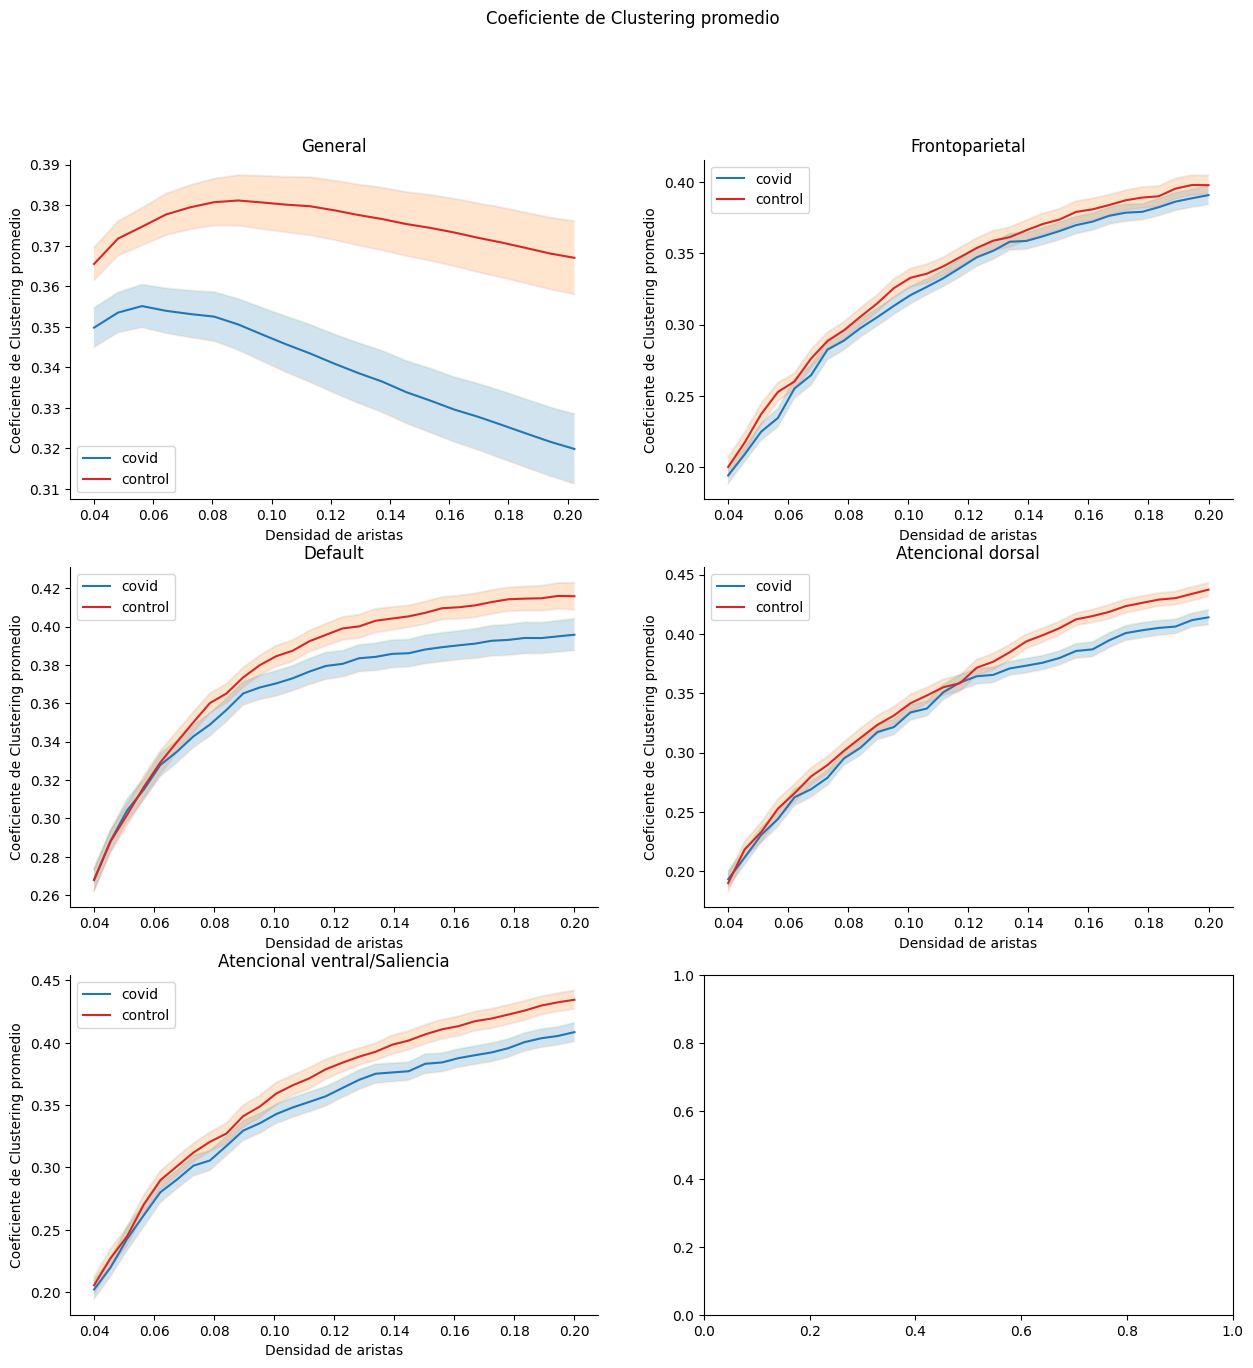

{'': {'covid': 0.055185582203837256, 'control': 0.060931526620974764},
 'Cont': {'covid': 0.05220947862571883, 'control': 0.053609016908672806},
 'Default': {'covid': 0.05865284198260372, 'control': 0.0608456889484084},
 'DorsAttn': {'covid': 0.05429902883893244, 'control': 0.05651104457153505},
 'SalVentAttn': {'covid': 0.05514703878376426, 'control': 0.05805474776180545}}

In [18]:
plot_measure(base_folder, networks, 'avg_clustering', 'Coeficiente de Clustering promedio')

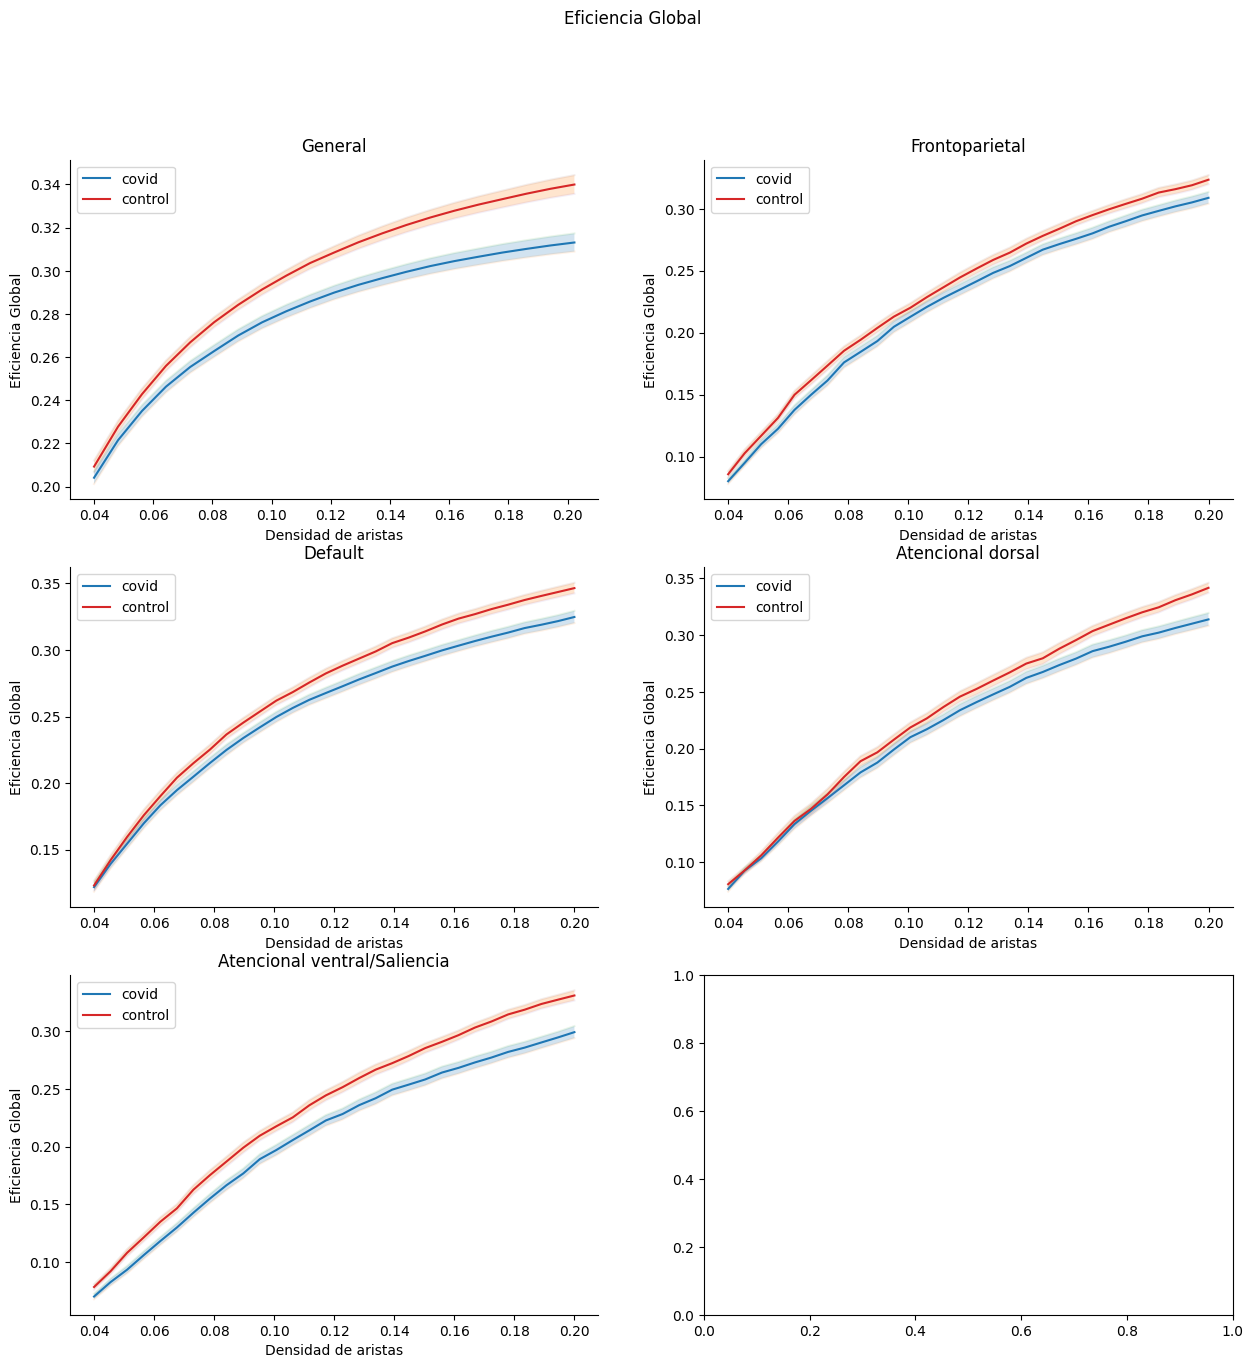

{'': {'covid': 0.045572414784737475, 'control': 0.04845700013713909},
 'Cont': {'covid': 0.03585394757380966, 'control': 0.037623071579007517},
 'Default': {'covid': 0.040935292001911816, 'control': 0.043231590995317135},
 'DorsAttn': {'covid': 0.03574911519954871, 'control': 0.03767966282382302},
 'SalVentAttn': {'covid': 0.033584319489193035, 'control': 0.0373032867061213}}

In [19]:
plot_measure(base_folder, networks, 'global_efficiency', 'Eficiencia Global')

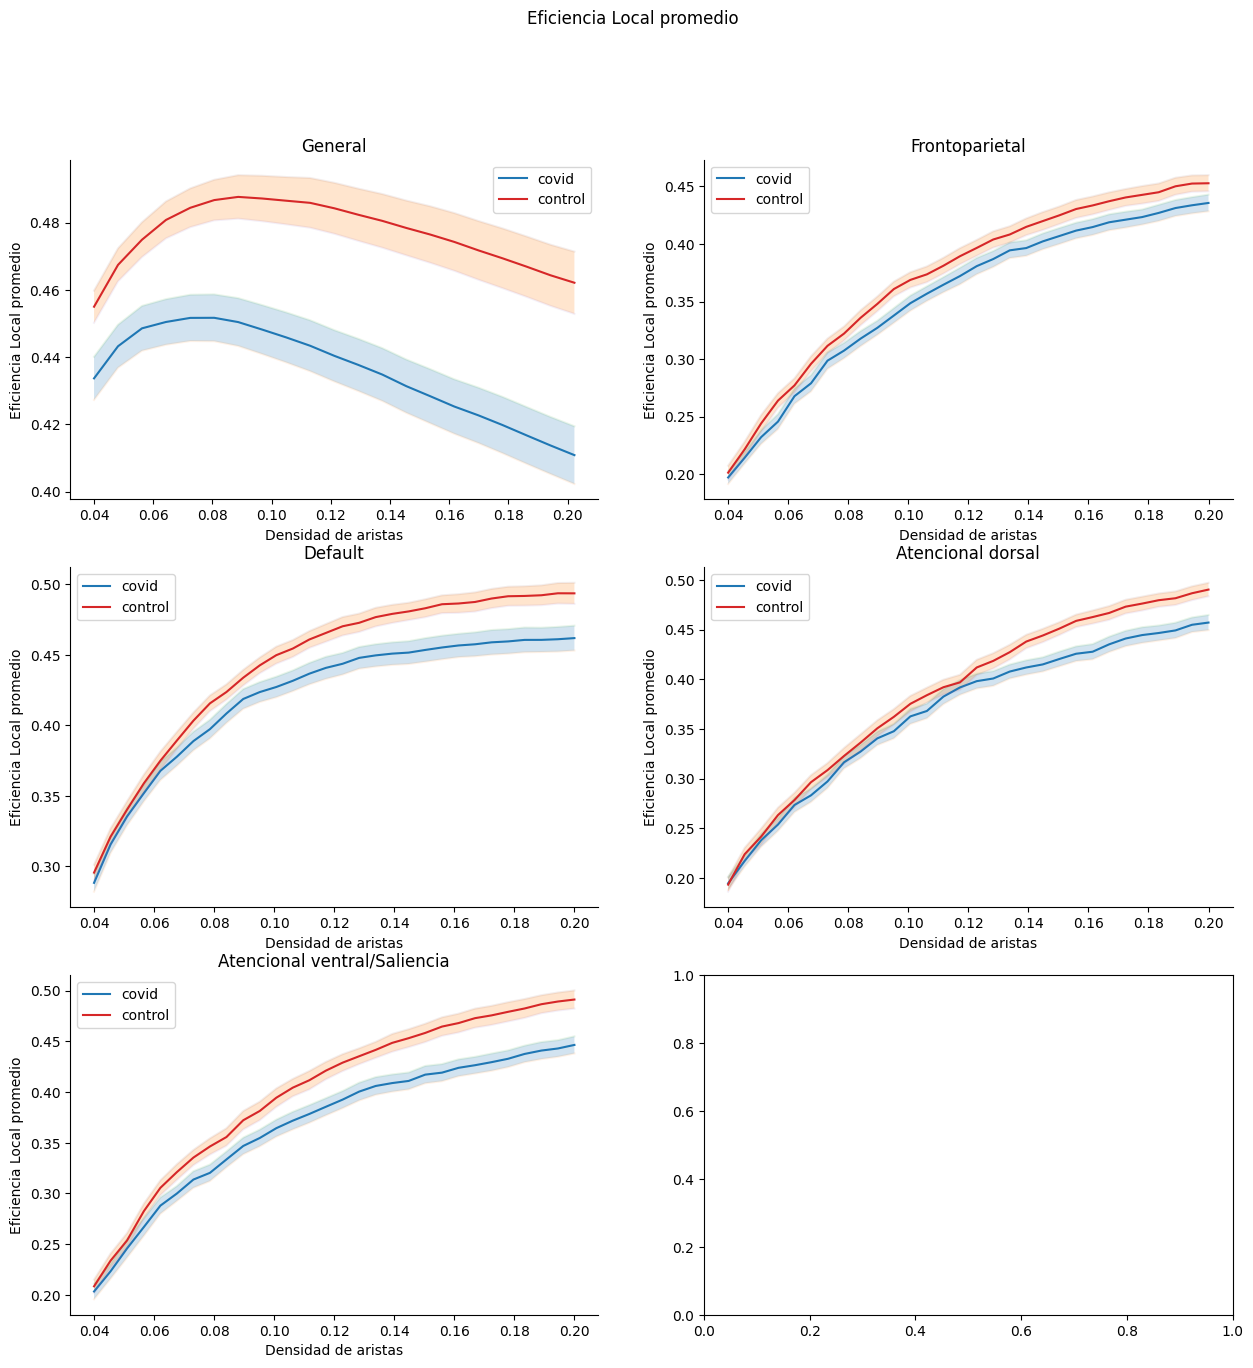

{'': {'covid': 0.07081587540618686, 'control': 0.07749044877171363},
 'Cont': {'covid': 0.0570197317147768, 'control': 0.059697446422744105},
 'Default': {'covid': 0.06767685496422751, 'control': 0.07124286530145525},
 'DorsAttn': {'covid': 0.059055910649275276, 'control': 0.06206449750426113},
 'SalVentAttn': {'covid': 0.05907093741016663, 'control': 0.06428767645910781}}

In [20]:
plot_measure(base_folder, networks, 'avg_local_efficiency', 'Eficiencia Local promedio')

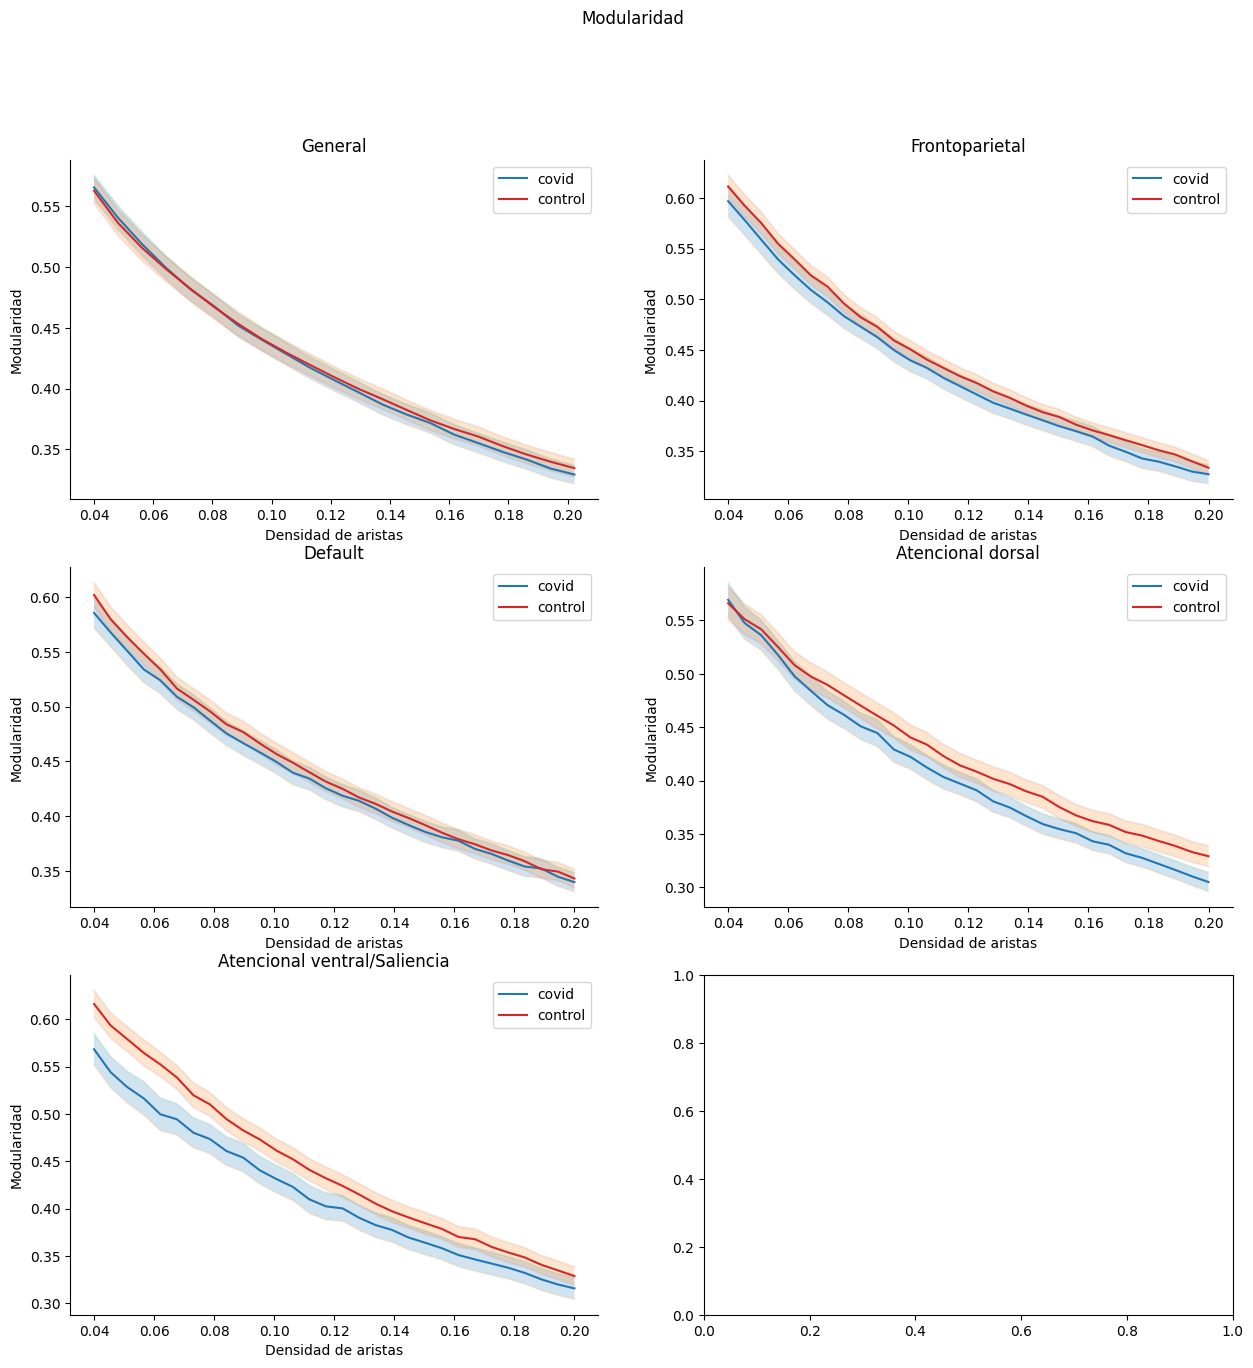

{'': {'covid': 0.06796385041391557, 'control': 0.06827657177952375},
 'Cont': {'covid': 0.06826286132936914, 'control': 0.07003803209386458},
 'Default': {'covid': 0.06953185980025708, 'control': 0.07060920761112123},
 'DorsAttn': {'covid': 0.0649871440898078, 'control': 0.06782317621850072},
 'SalVentAttn': {'covid': 0.0661928566623141, 'control': 0.0708274827702495}}

In [21]:
plot_measure(base_folder, networks, 'modularity', 'Modularidad')